# Import Libraries

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Create data and transfer to Data Frame


In [11]:
data = {
    "name":        ["Ali", "Mona", "Sara", "Omar", "John", "Laila", "Ahmed", "Yara", "Khaled", "Hana"],
    "study_hours": [2, 4, None, 8, 1, 7, 3, None, 5, 10],   # Some missing values
    "attendance":  [60, 80, 90, None, 40, 85, None, 98, 75, 100],  # Missing values
    "pass":        [0, 0, 1, 1, 0, 1, 0, 1, 1, 1]
}

df = pd.DataFrame(data)
print("Original Data:")
print(df)


Original Data:
     name  study_hours  attendance  pass
0     Ali          2.0        60.0     0
1    Mona          4.0        80.0     0
2    Sara          NaN        90.0     1
3    Omar          8.0         NaN     1
4    John          1.0        40.0     0
5   Laila          7.0        85.0     1
6   Ahmed          3.0         NaN     0
7    Yara          NaN        98.0     1
8  Khaled          5.0        75.0     1
9    Hana         10.0       100.0     1


# Data Cleaning

In [12]:
# Handle missing values (replace with mean of the column)
df["study_hours"].fillna(df["study_hours"].mean(), inplace=True)
df["attendance"].fillna(df["attendance"].mean(), inplace=True)

print("\nCleaned Data:")
print(df)


Cleaned Data:
     name  study_hours  attendance  pass
0     Ali          2.0        60.0     0
1    Mona          4.0        80.0     0
2    Sara          5.0        90.0     1
3    Omar          8.0        78.5     1
4    John          1.0        40.0     0
5   Laila          7.0        85.0     1
6   Ahmed          3.0        78.5     0
7    Yara          5.0        98.0     1
8  Khaled          5.0        75.0     1
9    Hana         10.0       100.0     1


/tmp/ipython-input-4207030265.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["study_hours"].fillna(df["study_hours"].mean(), inplace=True)
/tmp/ipython-input-4207030265.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

# Split Features and Training/Testing

In [19]:
# Split features (X) and labels (y)
X = df[["study_hours", "attendance"]]
y = df["pass"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Select and Train Model


In [20]:
# Initialize Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

# Testing Data

In [21]:
# Test the model
predictions = model.predict(X_test)

# Check Accuracy

In [22]:
accuracy = model.score(X_test, y_test)
print("\nModel Accuracy:", accuracy)


Model Accuracy: 0.6666666666666666


# Show Results

In [23]:
# Add student names back to results
results = X_test.copy()
results["actual"] = y_test.values
results["predicted"] = predictions
results["name"] = df.loc[y_test.index, "name"]

print("\nPredictions with Student Names:")
print(results)



Predictions with Student Names:
   study_hours  attendance  actual  predicted    name
8          5.0        75.0       1          0  Khaled
1          4.0        80.0       0          0    Mona
5          7.0        85.0       1          1   Laila


# Plot Results

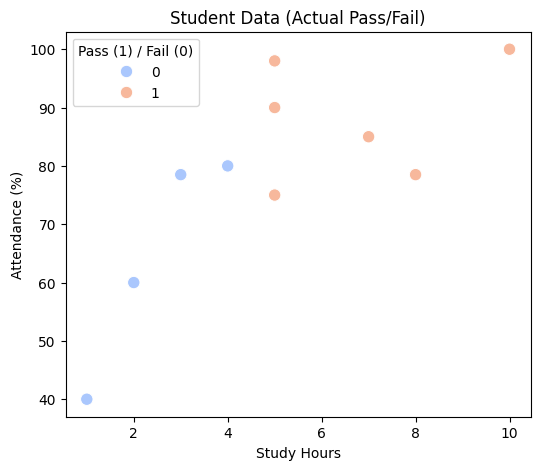

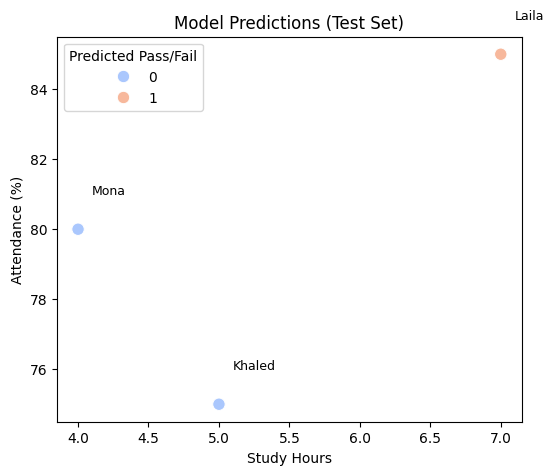

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=df, x="study_hours", y="attendance",
    hue="pass", palette="coolwarm", s=80
)
plt.title("Student Data (Actual Pass/Fail)")
plt.xlabel("Study Hours")
plt.ylabel("Attendance (%)")
plt.legend(title="Pass (1) / Fail (0)")
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(
    data=results, x="study_hours", y="attendance",
    hue="predicted", palette="coolwarm", s=80
)

# Add student names to points
for i, row in results.iterrows():
    plt.text(row["study_hours"]+0.1, row["attendance"]+1, row["name"], fontsize=9)

plt.title("Model Predictions (Test Set)")
plt.xlabel("Study Hours")
plt.ylabel("Attendance (%)")
plt.legend(title="Predicted Pass/Fail")
plt.show()